In [2]:
import numpy as np
import pandas as pd
import math
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
filepath = "C:\\Users\\sudhi\\OneDrive\\Desktop\\Python\\Retail \\"
file_transaction = "Transactions.csv"
file_customers ="Customer.csv"
file_prod = "Product Heirarchy.csv"

In [4]:
tran = pd.read_csv(filepath + file_transaction)
cust = pd.read_csv(filepath + file_customers)
prod = pd.read_csv(filepath + file_prod)

# 
1. Merging the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensuring to
keep all customers who have done transactions with us and selecting the join type accordingly.

In [5]:
tran_cust = pd.merge(left =tran,right=cust,left_on=['cust_id'],right_on=['customer_Id'],how='left')

In [6]:
customer_final = pd.merge(left=tran_cust,right=prod,left_on=['prod_cat_code','prod_subcat_code'],right_on=['prod_cat_code','prod_sub_cat_code'],how='left')

# 2. Prepared a summary report for the merged data set.
a.Get the column names and their corresponding data types.

In [7]:
print(customer_final.dtypes)

transaction_id         int64
cust_id                int64
tran_date             object
prod_subcat_code       int64
prod_cat_code          int64
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
customer_Id            int64
DOB                   object
Gender                object
city_code            float64
prod_cat              object
prod_sub_cat_code      int64
prod_subcat           object
dtype: object


#
b. Top/Bottom 10 observations

In [8]:
customer_final.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,270384,11-05-1973,F,8.0,Electronics,5,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0,Books,6,DIY
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,271509,08-06-1981,M,3.0,Home and kitchen,11,Bath
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0,Books,6,DIY
5,97439039119,272357,23-02-2014,8,3,-2,-824,173.040,-1821.040,TeleShop,272357,09-10-1982,F,6.0,Electronics,8,Personal Appliances
6,45649838090,273667,22-02-2014,11,6,-1,-1450,152.250,-1602.250,e-Shop,273667,29-05-1981,M,9.0,Home and kitchen,11,Bath
7,22643667930,271489,22-02-2014,12,6,-1,-1225,128.625,-1353.625,TeleShop,271489,21-04-1971,M,9.0,Home and kitchen,12,Tools
8,79792372943,275108,22-02-2014,3,1,-3,-908,286.020,-3010.020,MBR,275108,04-11-1971,F,8.0,Clothing,3,Kids
9,50076728598,269014,21-02-2014,8,3,-4,-581,244.020,-2568.020,e-Shop,269014,27-11-1979,F,3.0,Electronics,8,Personal Appliances


In [9]:
customer_final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
23043,49882891062,271982,25-01-2011,10,5,4,1330,558.600,5878.600,e-Shop,271982,10-08-1976,M,8.0,Books,10,Non-Fiction
23044,14787475597,273982,25-01-2011,4,3,5,969,508.725,5353.725,e-Shop,273982,12-10-1991,M,4.0,Electronics,4,Mobiles
23045,50691119572,273031,25-01-2011,6,5,1,1148,120.540,1268.540,TeleShop,273031,17-01-1980,F,8.0,Books,6,DIY
23046,40893803228,272049,25-01-2011,11,6,3,1077,339.255,3570.255,e-Shop,272049,28-06-1975,F,6.0,Home and kitchen,11,Bath
23047,30856003613,266866,25-01-2011,4,2,2,444,93.240,981.240,TeleShop,266866,18-04-1974,M,4.0,Footwear,4,Kids
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,274550,21-02-1972,M,7.0,Books,12,Academic
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,270022,27-04-1984,M,9.0,Clothing,4,Mens
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,271020,20-06-1976,M,8.0,Home and kitchen,2,Furnishing
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,270911,22-05-1970,M,2.0,Books,11,Children
23052,77960931771,271961,25-01-2011,11,5,1,447,46.935,493.935,TeleShop,271961,15-01-1982,M,1.0,Books,11,Children


# 
c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [10]:
customer_final.describe()

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,customer_Id,city_code,prod_sub_cat_code
count,2.305300e+04,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23045.000000,23053.000000
mean,5.007348e+10,271021.746497,6.149091,3.763632,2.432395,636.369713,248.667192,2107.308002,271021.746497,5.482534,6.149091
std,2.898194e+10,2431.692059,3.726372,1.677016,2.268406,622.363498,187.177773,2507.561264,2431.692059,2.863499,3.726372
min,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,266783.000000,1.000000,1.000000
25%,2.493864e+10,268935.000000,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000,268935.000000,3.000000,3.000000
50%,5.009313e+10,270980.000000,5.000000,4.000000,3.000000,710.000000,199.080000,1754.740000,270980.000000,5.000000,5.000000
75%,7.533000e+10,273114.000000,10.000000,5.000000,4.000000,1109.000000,365.715000,3569.150000,273114.000000,8.000000,10.000000
max,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,275265.000000,10.000000,12.000000


#
d.Frequency tables for all the categorical variables

In [11]:
Q2_d=customer_final.select_dtypes(include=object)

In [12]:
for i in Q2_d:
    frequency = Q2_d[i].value_counts()
    print(f'Frequency for column {i}: \n {frequency} \n ')

Frequency for column tran_date: 
 13-07-2011    35
21-12-2013    33
23-10-2011    33
22-11-2011    33
25-09-2011    33
              ..
23-02-2014     2
24-02-2014     2
27-02-2014     1
21-02-2014     1
28-02-2014     1
Name: tran_date, Length: 1129, dtype: int64 
 
Frequency for column Store_type: 
 e-Shop            9311
MBR               4661
Flagship store    4577
TeleShop          4504
Name: Store_type, dtype: int64 
 
Frequency for column DOB: 
 27-12-1988    32
17-09-1982    32
25-02-1974    27
20-03-1972    25
18-11-1991    24
              ..
29-01-1976     1
01-05-1980     1
23-06-1988     1
25-06-1985     1
10-06-1972     1
Name: DOB, Length: 3987, dtype: int64 
 
Frequency for column Gender: 
 M    11811
F    11233
Name: Gender, dtype: int64 
 
Frequency for column prod_cat: 
 Books               6069
Electronics         4898
Home and kitchen    4129
Footwear            2999
Clothing            2960
Bags                1998
Name: prod_cat, dtype: int64 
 
Frequency for col

# 3. Generated histograms for all continuous variables and frequency bars for categorical variables.

In [13]:
num_df = customer_final.select_dtypes(exclude=['object'])

In [14]:
cat_df = customer_final.select_dtypes(include=['object'])

In [15]:
def outlier_treatment(var):
   
    lc = var.quantile(0.10) 
    uc = var.quantile(0.90) 
    var = var.clip(lower = lc, upper = uc)
    return var

In [16]:
def missing_value_treatment_num(var):
    var = var.fillna(var.median())
    return var
def missing_value_treatment_cat(var):
    var = var.fillna(var.mode()[0])
    return var 

In [17]:
num_df = num_df.apply(outlier_treatment)
num_df = num_df.apply(missing_value_treatment_num)
cat_df = cat_df.apply(missing_value_treatment_cat)

In [18]:
def histogram (var):
    var_chart = sns.histplot(var)
    plt.title("Histogram for " + var.name)
    plt.ylabel("Frequency")
    plt.show()
    return var_chart

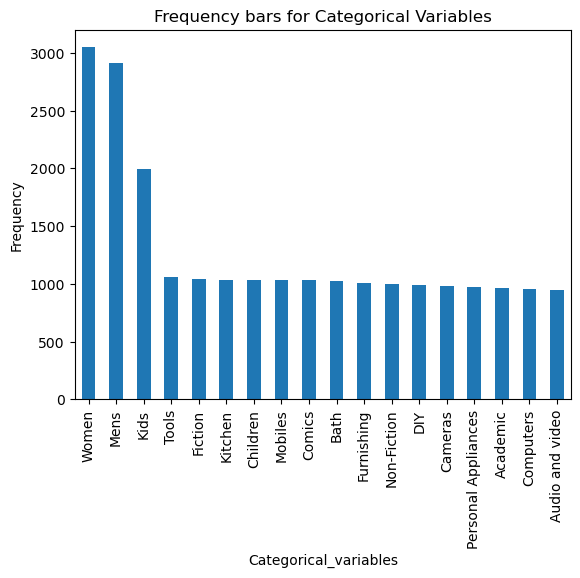

In [19]:
for column in cat_df:
        category_counts = cat_df[column].value_counts()
category_counts.plot(kind= 'bar')
plt.xlabel("Categorical_variables")
plt.ylabel("Frequency")
plt.title("Frequency bars for Categorical Variables")
plt.show()

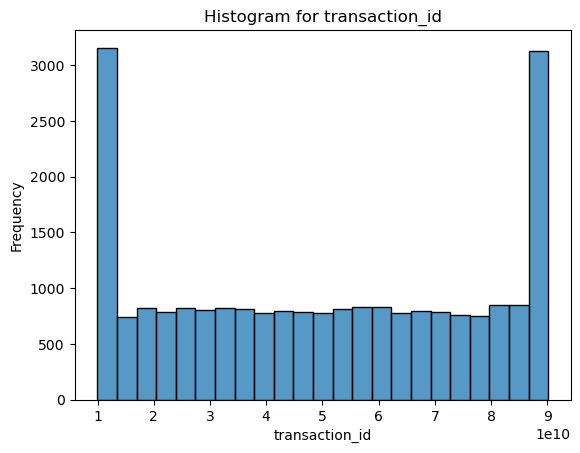

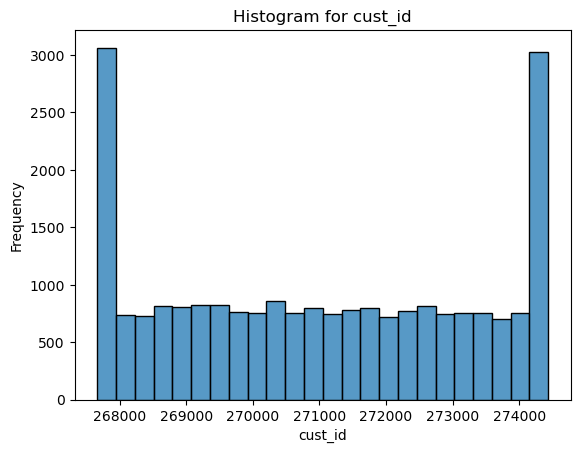

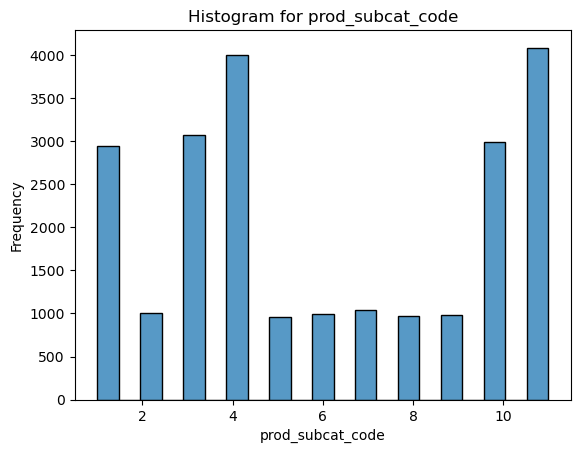

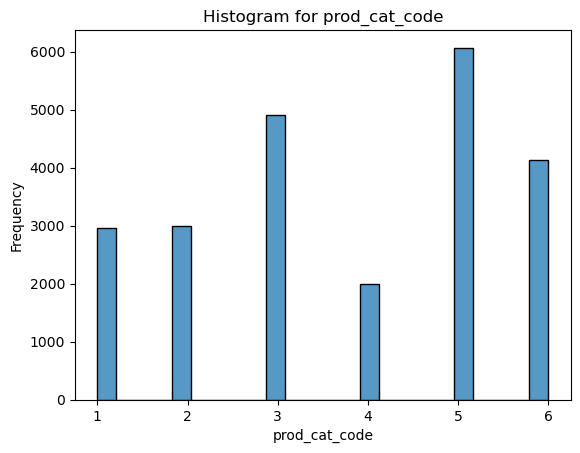

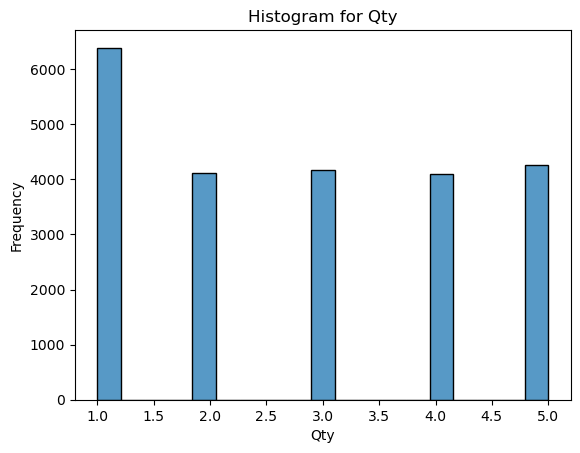

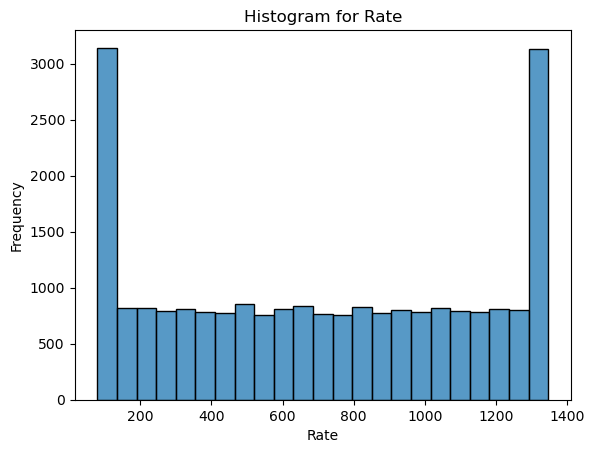

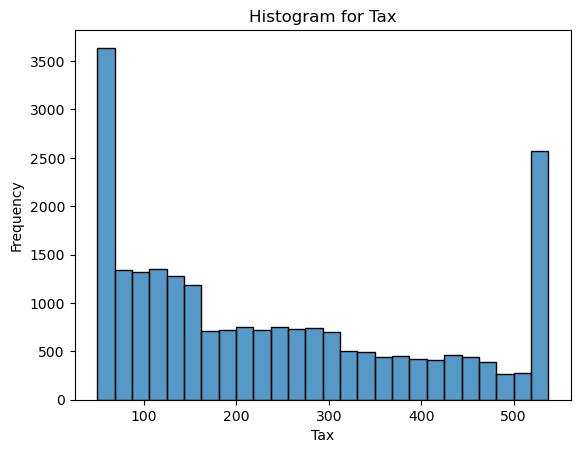

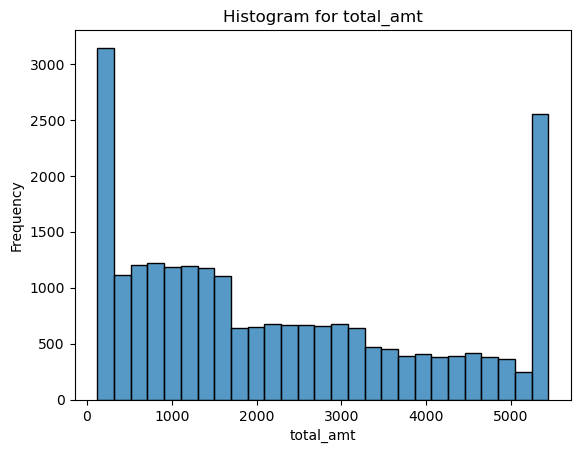

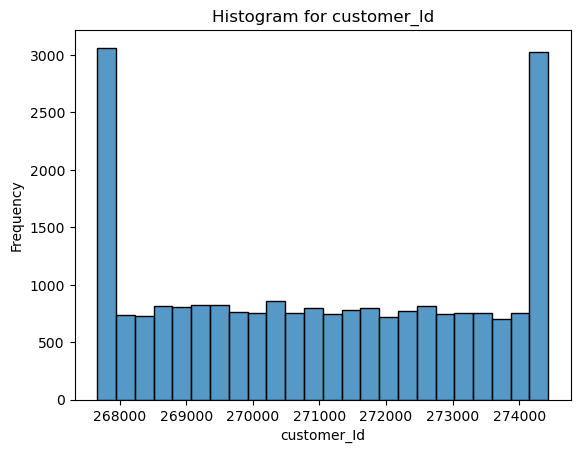

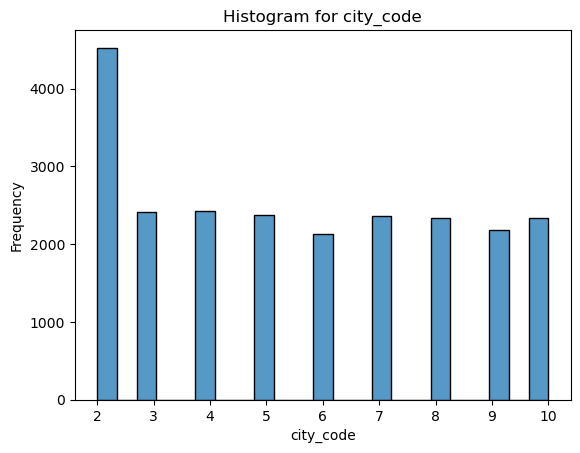

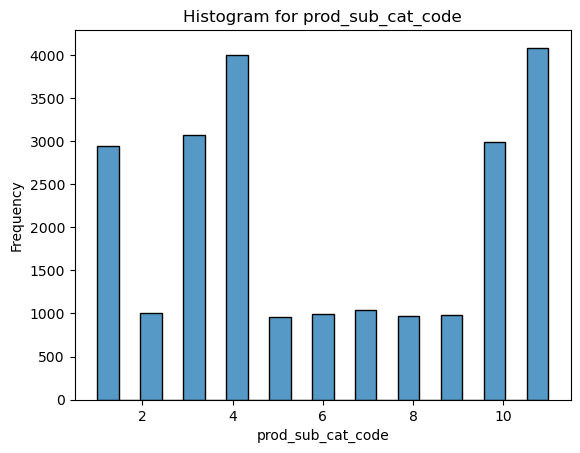

In [20]:
num_df.apply(histogram)
plt.show()

# 4. Calculated the following information using the merged dataset :
    a. Time period of the available transaction data

In [21]:
customer_final['tran_date']=pd.to_datetime(customer_final['tran_date'])

In [22]:
Timeperiod=customer_final['tran_date'].max() - customer_final['tran_date'].min()

In [23]:
timeperiod_str = str(Timeperiod)


In [24]:
time_period=timeperiod_str.replace(" days 00:00:00","")

In [25]:
time_period=int(time_period)//365

In [26]:
print(time_period,"years")

3 years


# 
b. Count of transactions where the total amount of transaction was negative

In [27]:
x=0
for i in customer_final['total_amt']:
    if(str(i).startswith('-') ):
        x+=1
print('Total negative transaction amount is ',x)    

Total negative transaction amount is  2177


# 
5. Analyzed which product categories are more popular among females vs male customers.

In [28]:
customer_final.pivot_table(index =['Gender','prod_cat'],values=['cust_id'],aggfunc='count').sort_values(by=['cust_id']).reset_index()

,Gender,prod_cat,cust_id
0,F,Bags,994
1,M,Bags,1004
2,F,Clothing,1439
3,M,Footwear,1469
4,M,Clothing,1518
5,F,Footwear,1529
6,F,Home and kitchen,1994
7,M,Home and kitchen,2134
8,F,Electronics,2328
9,M,Electronics,2570


#
6. Which City code has the maximum customers and what was the percentage of customers from
that city?

In [29]:
customer_final.groupby(by=['city_code']).agg(customers=('cust_id',pd.Series.nunique),percentage=('transaction_id',lambda x:(x.nunique()/x.count()*100)))

,customers,percentage
city_code,,
1.0,535,91.496900
2.0,546,90.132159
3.0,576,91.082538
4.0,569,90.627581
5.0,570,90.635593
6.0,516,90.785143
7.0,563,90.237691
8.0,551,89.785408
9.0,532,90.771350


# 
7. Which store type sells the maximum products by value and by quantity?

In [30]:
result=customer_final.groupby(by = 'Store_type').agg(Quantity=('Qty',np.sum),Amount=('total_amt',np.sum))
result.sort_values(by=['Quantity','Amount'], ascending = False)

,Quantity,Amount
Store_type,,
e-Shop,22763,1.982482e+07
MBR,11194,9.674486e+06
Flagship store,11133,9.715688e+06
TeleShop,10984,9.364781e+06


# 
8. What was the total amount earned from the "Electronics" and "Clothing" categories from
Flagship Stores?

In [31]:
step1=customer_final.loc[(customer_final['prod_cat'] == 'Electronics') | (customer_final['prod_cat'] == 'Clothing')]

In [32]:
step1.groupby(by='prod_cat').agg(Total_amount=('total_amt',sum))

,Total_amount
prod_cat,
Clothing,6.251137e+06
Electronics,1.072246e+07


# 
9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [33]:
step_a=customer_final.loc[(customer_final['Gender'] == "M") & (customer_final['prod_cat'] == 'Electronics')]

In [34]:
step_a.groupby(by=['Gender','prod_cat']).agg(Total_amount=('total_amt',sum))

,,Total_amount
Gender,prod_cat,
M,Electronics,5703109.425


# 
10. How many customers have more than 10 unique transactions, after removing all transactions
which have any negative amounts?

In [35]:
first=customer_final.loc[(customer_final['total_amt'] > 0)]

In [36]:
second=first.groupby('cust_id')['transaction_id'].nunique()


In [37]:
second = second.reset_index()

In [38]:
third = second.loc[(second['transaction_id'] >10)]

In [39]:
fourth = len(third)
print(' customers having more than 10 unique transactions = ',fourth)

 customers having more than 10 unique transactions =  6


## 11. For all customers aged between 25 - 35,



In [40]:
customer_final['tran_date']= pd.to_datetime(customer_final['tran_date'])

In [41]:
customer_final['DOB']= pd.to_datetime(customer_final['DOB'])

In [42]:
age= customer_final['tran_date'] - customer_final['DOB']

In [43]:
age = age.astype(str).str.replace(" days", "")

In [44]:
age=age.astype(int)//365

In [45]:
customer_final['Age']=age

In [46]:
Q11=customer_final.loc[(customer_final['Age']>25) & (customer_final['Age']<35)]

# 
a. What was the total amount spent for “Electronics” and “Books” product categories?

In [48]:
Q11=Q11.loc[(Q11['prod_cat']== 'Electronics') | (Q11['prod_cat']=='Books')]

In [49]:
Q11.groupby(by='prod_cat').agg(total=('total_amt','sum'))

,total
prod_cat,
Books,5033505.945
Electronics,4099395.300


# 
b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [50]:
start_date = pd.to_datetime('2014-01-01')
end_date = pd.to_datetime('2014-03-01')

In [51]:
sum1=Q11[(Q11['tran_date']>start_date) & (Q11['tran_date']<end_date)]

In [52]:
print("The total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014 is ",sum1['total_amt'].sum())

The total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014 is  213835.18
